In [2]:
from sklearn import datasets

data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer['DESCR'])
# print(data_breast_cancer)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
data_iris = datasets.load_iris(as_frame=True)
print(data_iris['DESCR'])


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
# wybieramy tylko interesujace nas dane
X_bc = data_breast_cancer.data[['mean area', 'mean smoothness']]
y_bc = data_breast_cancer['target']

# dzielimy na zbior uczacy i testujacy
from sklearn.model_selection import train_test_split
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.2)


In [5]:
# Model bez skalowania
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model_bc_no_scaling = LinearSVC(loss="hinge")
model_bc_no_scaling.fit(X_bc_train, y_bc_train)

c:\Users\igorw\miniforge3\envs\ml\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(loss='hinge')

In [6]:
# sprawdz dokladnosci
acc_bc_train_no_scaling = accuracy_score(y_bc_train, model_bc_no_scaling.predict(X_bc_train))
acc_bc_test_no_scaling = accuracy_score(y_bc_test, model_bc_no_scaling.predict(X_bc_test))
print(f"no scalling train: {acc_bc_train_no_scaling}")
print(f"no scalling test: {acc_bc_test_no_scaling}")

no scalling train: 0.3934065934065934
no scalling test: 0.3157894736842105


In [7]:
# model ze zeskalowanymi danymi
from sklearn.preprocessing import StandardScaler

# scaller
scaler_bc = StandardScaler()
scaler_bc.fit(X_bc_train)
X_bc_train_scaled = scaler_bc.transform(X_bc_train)
X_bc_test_scaled = scaler_bc.transform(X_bc_test)

# model
model_bc_scaling = LinearSVC(loss="hinge")
model_bc_scaling.fit(X_bc_train_scaled, y_bc_train)

LinearSVC(loss='hinge')

In [8]:
# zobacz dokladnosci
acc_bc_train_scaling = accuracy_score(y_bc_train, model_bc_scaling.predict(X_bc_train_scaled))
acc_bc_test_scaling = accuracy_score(y_bc_test, model_bc_scaling.predict(X_bc_test_scaled))
print(f"scalling train: {acc_bc_train_scaling}")
print(f"scalling test: {acc_bc_test_scaling}")

scalling train: 0.9032967032967033
scalling test: 0.8859649122807017


In [9]:
# zapis wynikow 
import pickle
bc_acc = [acc_bc_train_no_scaling, acc_bc_test_no_scaling, acc_bc_train_scaling, acc_bc_test_scaling]
with open("bc_acc.pkl", "wb") as f:
    pickle.dump(bc_acc, f)

In [10]:
# TO SAMO DLA IRIS
# wybieramy dane ktore nas interesuja
X_iris = data_iris.data[['petal length (cm)', 'petal width (cm)']]
y_iris = (data_iris['target'] == 2).astype(int)

# dzielimy na zbior uczacy i testujacy
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.2)

In [11]:
# model bez skalowania
model_iris_no_scaling = LinearSVC(loss="hinge")
model_iris_no_scaling.fit(X_iris_train, y_iris_train)

# sprawdz dokladnosci
acc_iris_train_no_scaling = accuracy_score(y_iris_train, model_iris_no_scaling.predict(X_iris_train))
acc_iris_test_no_scaling = accuracy_score(y_iris_test, model_iris_no_scaling.predict(X_iris_test))
print(f"no scalling train: {acc_iris_train_no_scaling}")
print(f"no scalling test: {acc_iris_test_no_scaling}")

no scalling train: 0.9583333333333334
no scalling test: 0.9333333333333333


c:\Users\igorw\miniforge3\envs\ml\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
# model za skalowaniem
scaler_iris = StandardScaler()
scaler_iris.fit(X_iris_train)
X_iris_train_scaled = scaler_iris.transform(X_iris_train)
X_iris_test_scaled = scaler_iris.transform(X_iris_test)

model_iris_scaling = LinearSVC(loss="hinge")
model_iris_scaling.fit(X_iris_train_scaled, y_iris_train)

# sprawdz doskladnosci
acc_iris_train_scaling = accuracy_score(y_iris_train, model_iris_scaling.predict(X_iris_train_scaled))
acc_iris_test_scaling = accuracy_score(y_iris_test, model_iris_scaling.predict(X_iris_test_scaled))

print(f"scalling train: {acc_iris_train_scaling}")
print(f"scalling test: {acc_iris_test_scaling}")


scalling train: 0.9583333333333334
scalling test: 0.9333333333333333


In [13]:
# zapis wynikow
iris_acc = [acc_iris_train_no_scaling, acc_iris_test_no_scaling, acc_iris_train_scaling, acc_iris_test_scaling]
with open("iris_acc.pkl", "wb") as f:
    pickle.dump(iris_acc, f)


<Axes: xlabel='x', ylabel='y'>

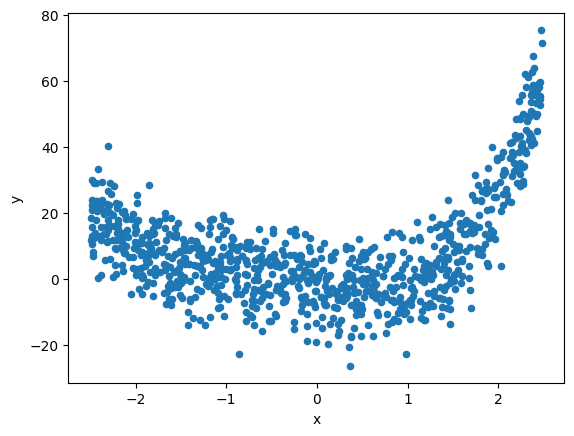

In [14]:
import numpy as np
import pandas as pd
size = 900
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df[['x']], df['y'], test_size=0.2)

In [16]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_svr = make_pipeline(PolynomialFeatures(degree=4), StandardScaler(), LinearSVR())
poly_svr.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR())])

In [17]:
from sklearn.metrics import mean_squared_error

mse_train_poly = mean_squared_error(y_train, poly_svr.predict(X_train))
mse_test_poly = mean_squared_error(y_test, poly_svr.predict(X_test))

print(f"mse train: {mse_train_poly}")
print(f"mse test: {mse_test_poly}")


mse train: 61.90812789927788
mse test: 64.12426627641227


In [18]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# SVR z kernelem polynomialnym 4 stopnia
svr_poly = make_pipeline(PolynomialFeatures(degree=4), StandardScaler(), SVR(kernel='poly', degree=4))
svr_poly.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('standardscaler', StandardScaler()),
                ('svr', SVR(degree=4, kernel='poly'))])

In [19]:
# Obliczenie MSE dla domyślnego SVR
mse_train_svr = mean_squared_error(y_train, svr_poly.predict(X_train))
mse_test_svr = mean_squared_error(y_test, svr_poly.predict(X_test))
print(f"SVR poly (default) - MSE train: {mse_train_svr}")
print(f"SVR poly (default) - MSE test: {mse_test_svr}")

SVR poly (default) - MSE train: 68.4366360334727
SVR poly (default) - MSE test: 71.36707520591575


In [20]:
import pickle

# GridSearchCV do znalezienia najlepszych hiperparametrów dla SVR
param_grid = {'svr__C': [0.1, 1, 10], 'svr__coef0': [0.1, 1, 10]}
grid_search = GridSearchCV(make_pipeline(PolynomialFeatures(degree=4), StandardScaler(), SVR(kernel='poly', degree=4)),
                           param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(df[['x']], df['y'])
print("parametry:", grid_search.best_params_)

best_svr = make_pipeline(PolynomialFeatures(degree=4), StandardScaler(),
                         SVR(kernel='poly', degree=4, C=grid_search.best_params_['svr__C'],
                             coef0=grid_search.best_params_['svr__coef0']))
best_svr.fit(X_train, y_train)


parametry: {'svr__C': 1, 'svr__coef0': 1}


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('standardscaler', StandardScaler()),
                ('svr', SVR(C=1, coef0=1, degree=4, kernel='poly'))])

In [21]:
# obliczanie mse
mse_train_best_svr = mean_squared_error(y_train, best_svr.predict(X_train))
mse_test_best_svr = mean_squared_error(y_test, best_svr.predict(X_test))
print(f"mse train: {mse_train_best_svr}")
print(f"mse test: {mse_test_best_svr}")

mse train: 61.312551565326004
mse test: 64.28197371344915


In [22]:
# zapis wynikow
mse_results = [mse_train_poly, mse_test_poly, mse_train_best_svr, mse_test_best_svr]
with open('reg_mse.pkl', 'wb') as f:
    pickle.dump(mse_results, f)